In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from typing import Callable
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
Loss = Callable[[torch.Tensor, torch.Tensor], torch.Tensor]


def train_simple_network(
    model: nn.Module,
    loss_func: Loss,
    training_loader: DataLoader,
    epochs: int = 20,
    device: str = "cuda",
) -> None:
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):
        model = model.train()
        running_loss = 0.0

        for input, labels in tqdm(training_loader, desc="Training"):
            input = input.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            output = model(input)
            loss = loss_func(output, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

# Loading data


<Axes: >

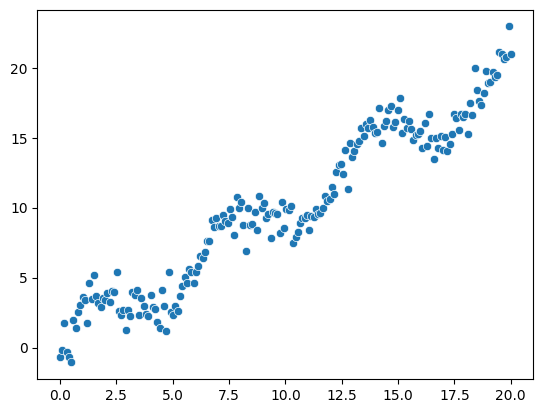

In [3]:
X = np.linspace(0, 20, num=200)
y = X + np.sin(X) * 2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X, y=y)

## Dataset e DataLoader


In [4]:
class SimpleRegressionDataset(Dataset):
    def __init__(self, X: torch.Tensor, y: torch.Tensor) -> None:
        super().__init__()
        self.X = X.reshape(-1, 1)
        self.y = y.reshape(-1, 1)

    def __len__(self) -> int:
        return self.X.shape[0]

    def __getitem__(self, idx: int) -> tuple[torch.Tensor, torch.Tensor]:
        X = torch.tensor(self.X[idx, :], dtype=torch.float32)
        y = torch.tensor(self.y[idx, :], dtype=torch.float32)
        return X, y


In [5]:
training_dataset = SimpleRegressionDataset(X, y)
training_loader = DataLoader(training_dataset, shuffle=True)


## Running


In [ ]:
in_features = 1
out_features = 1
model = nn.Sequential(nn.Linear(1, 10), nn.Tanh(), nn.Linear(10, 1))
loss_func = nn.MSELoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_simple_network(model, loss_func, training_loader, device=device, epochs=1000)

<Axes: >

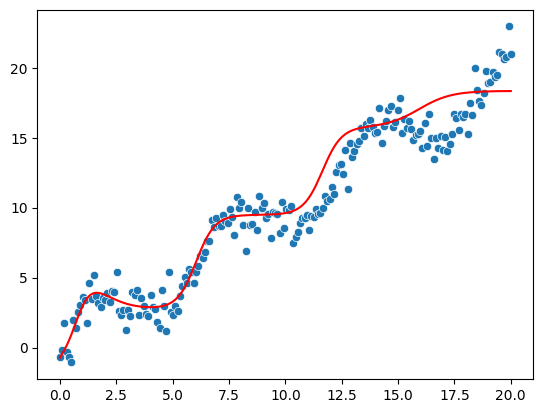

In [15]:
with torch.inference_mode():
    Y_pred = (
        model(torch.tensor(X.reshape(-1, 1), device=device, dtype=torch.float32))
        .cpu()
        .numpy()
    )

sns.scatterplot(x=X, y=y)
sns.lineplot(x=X, y=Y_pred.ravel(), color="red")